# Data Augmentation

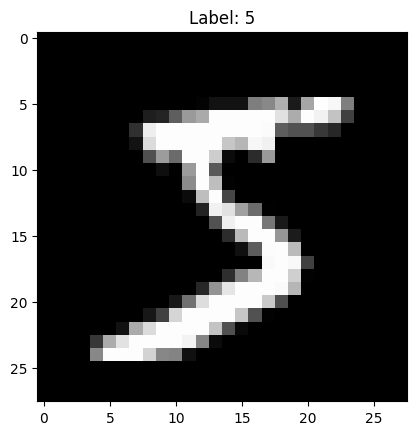

In [ ]:
import torch
import random
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,)),
])

# Load the MNIST dataset with the transformation
dataset = datasets.MNIST('../data', train=True, download=True, transform=transform)

# Retrieve an image from the dataset
image, label = dataset[0]  # Get the first image and its label

# Convert the tensor to a numpy array and remove the batch dimension
image = image.squeeze().numpy()

# Display the image
plt.imshow(image, cmap='gray')
plt.title(f'Label: {label}')
plt.show()

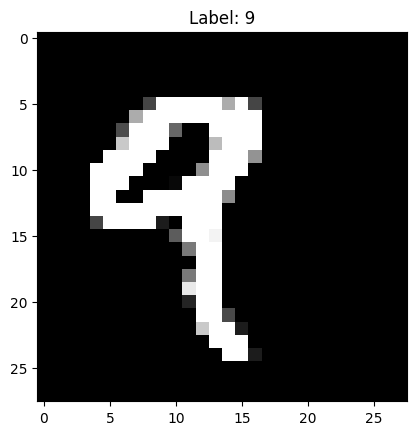

In [ ]:
import torch
import random
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, Dataset
import matplotlib.pyplot as plt
import cv2
import numpy as np
from PIL import Image

# Custom transformation to add Gaussian noise
class AddGaussianNoise:
    def __init__(self, mean=0., std=0.1):
        self.mean = mean
        self.std = std

    def __call__(self, tensor):
        return tensor + torch.randn(tensor.size()) * self.std + self.mean

    def __repr__(self):
        return self.__class__.__name__ + '(mean={0}, std={1})'.format(self.mean, self.std)

# Define the augmentation pipeline with thinning and Gaussian noise
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert to tensor
    transforms.Normalize((0.1307,), (0.3081,)),  # Normalize
    transforms.RandomAffine(degrees=(-5,5), translate=(0.2, 0.2), scale=(0.9, 1.1), shear=5),  # Random affine
    transforms.RandomApply([transforms.GaussianBlur(kernel_size=1)], p=0.3),  # Gaussian blur
    transforms.RandomApply([transforms.ColorJitter(brightness=0.1, contrast=0.1)], p=0.3),
    transforms.RandomApply([AddGaussianNoise(mean=0., std=0.1)], p=0.2)  # Add Gaussian noise
])

# Load the MNIST dataset with the transformation
dataset = datasets.MNIST('../data', train=True, download=True, transform=transform)

# Retrieve an image from the dataset
image, label = dataset[4]  # Get the first image and its label

# Convert the tensor to a numpy array and remove the batch dimension
image = image * 0.3081 + 0.1307  # Reverse the normalization
image = image.squeeze().numpy()

# Display the image
plt.imshow(image, cmap='gray')
plt.title(f'Label: {label}')
plt.show()

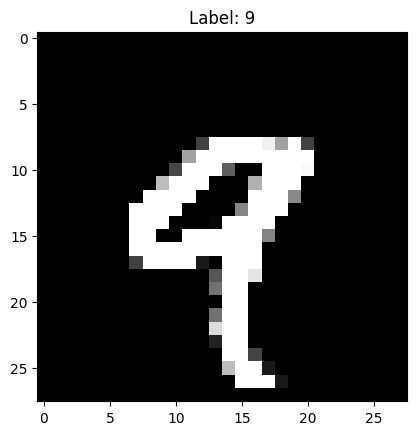

In [ ]:
import torch
import random
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, Dataset
import matplotlib.pyplot as plt
import cv2
import numpy as np
from PIL import Image

# Custom transformation to add Salt-and-Pepper noise
class AddSaltPepperNoise:
    def __init__(self, salt_prob=0.01, pepper_prob=0.01):
        self.salt_prob = salt_prob    # Probability of salt noise (white pixels)
        self.pepper_prob = pepper_prob  # Probability of pepper noise (black pixels)

    def __call__(self, tensor):
        # Convert tensor to numpy for easier manipulation
        img = tensor.numpy()

        # Create a noise mask
        noise = np.random.random(img.shape)

        # Add salt noise (white pixels)
        img[noise < self.salt_prob] = 1.0

        # Add pepper noise (black pixels)
        img[noise > (1 - self.pepper_prob)] = 0.0

        return torch.from_numpy(img)

    def __repr__(self):
        return self.__class__.__name__ + '(salt_prob={0}, pepper_prob={1})'.format(self.salt_prob, self.pepper_prob)

# Define the augmentation pipeline with Salt-and-Pepper noise
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert to tensor
    transforms.Normalize((0.1307,), (0.3081,)),  # Normalize
    transforms.RandomAffine(degrees=(-5,5), translate=(0.1, 0.1), scale=(0.9, 1.1), shear=5),  # Random affine
    transforms.RandomApply([transforms.ColorJitter(brightness=0.1, contrast=0.1)], p=0.3),
    transforms.RandomApply([AddSaltPepperNoise(salt_prob=0.01, pepper_prob=0.01)], p=0.3)  # Add Salt-and-Pepper noise
])

# Load the MNIST dataset with the transformation
dataset = datasets.MNIST('../data', train=True, download=True, transform=transform)

# Retrieve an image from the dataset
image, label = dataset[4]  # Get the fifth image and its label

# Convert the tensor to a numpy array and remove the batch dimension
image = image * 0.3081 + 0.1307  # Reverse the normalization
image = image.squeeze().numpy()

# Display the image
plt.imshow(image, cmap='gray')
plt.title(f'Label: {label}')
plt.show()

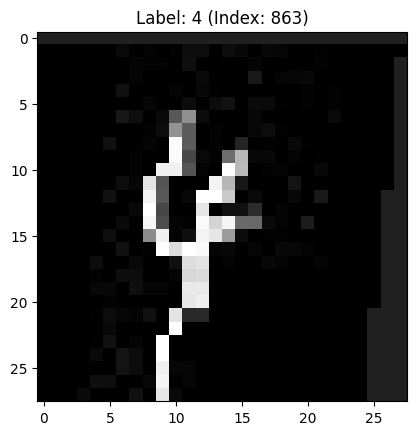

In [ ]:
import torch
import random
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, Dataset
import matplotlib.pyplot as plt
import cv2
import numpy as np
from PIL import Image

# Custom transformation to add Salt-and-Pepper noise
class AddSaltPepperNoise:
    def __init__(self, salt_prob=0.01, pepper_prob=0.01):
        self.salt_prob = salt_prob    # Probability of salt noise (white pixels)
        self.pepper_prob = pepper_prob  # Probability of pepper noise (black pixels)

    def __call__(self, tensor):
        # Convert tensor to numpy for easier manipulation
        img = tensor.numpy()

        # Create a noise mask
        noise = np.random.random(img.shape)

        # Add salt noise (white pixels)
        img[noise < self.salt_prob] = 1.0

        # Add pepper noise (black pixels)
        img[noise > (1 - self.pepper_prob)] = 0.0

        return torch.from_numpy(img)

    def __repr__(self):
        return self.__class__.__name__ + '(salt_prob={0}, pepper_prob={1})'.format(self.salt_prob, self.pepper_prob)

# Define the augmentation pipeline with Salt-and-Pepper noise
transform = transforms.Compose([
    transforms.Grayscale(),  # Convert to grayscale if your images aren't already
    transforms.ToTensor(),  # Convert to tensor
    transforms.Normalize((0.1307,), (0.3081,)),  # Normalize (using MNIST stats)
    transforms.RandomAffine(degrees=(-5,5), translate=(0.1, 0.1), scale=(0.9, 1.1), shear=5),  # Random affine
    transforms.RandomApply([transforms.ColorJitter(brightness=0.1, contrast=0.1)], p=0.3),
    transforms.RandomApply([AddSaltPepperNoise(salt_prob=0.01, pepper_prob=0.01)], p=0.2)  # Add Salt-and-Pepper noise
])

# Load your custom dataset
data_path = '/content/drive/MyDrive/Dataset/digits'
dataset = datasets.ImageFolder(root=data_path, transform=transform)

# Get a random index
random_idx = random.randint(0, len(dataset) - 1)

# Retrieve a random image from the dataset
image, label = dataset[random_idx]

# Convert the tensor to a numpy array and remove the batch dimension
image = image * 0.3081 + 0.1307  # Reverse the normalization
image = image.squeeze().numpy()  # Remove channel dimension for grayscale

# Display the image
plt.imshow(image, cmap='gray')
plt.title(f'Label: {label} (Index: {random_idx})')
plt.show()

# Training Model

Using random seed: 56190
Train Epoch: 1 [0/60000 (0%)]	Loss: 2.304473
Train Epoch: 1 [640/60000 (1%)]	Loss: 2.226835
Train Epoch: 1 [1280/60000 (2%)]	Loss: 2.812354
Train Epoch: 1 [1920/60000 (3%)]	Loss: 2.129526
Train Epoch: 1 [2560/60000 (4%)]	Loss: 1.600642
Train Epoch: 1 [3200/60000 (5%)]	Loss: 1.329041
Train Epoch: 1 [3840/60000 (6%)]	Loss: 1.266968
Train Epoch: 1 [4480/60000 (7%)]	Loss: 1.052451
Train Epoch: 1 [5120/60000 (9%)]	Loss: 1.149048
Train Epoch: 1 [5760/60000 (10%)]	Loss: 0.881080
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.690573
Train Epoch: 1 [7040/60000 (12%)]	Loss: 0.531058
Train Epoch: 1 [7680/60000 (13%)]	Loss: 0.490129
Train Epoch: 1 [8320/60000 (14%)]	Loss: 0.377326
Train Epoch: 1 [8960/60000 (15%)]	Loss: 0.819272
Train Epoch: 1 [9600/60000 (16%)]	Loss: 0.359023
Train Epoch: 1 [10240/60000 (17%)]	Loss: 0.636702
Train Epoch: 1 [10880/60000 (18%)]	Loss: 0.289503
Train Epoch: 1 [11520/60000 (19%)]	Loss: 0.373622
Train Epoch: 1 [12160/60000 (20%)]	Loss: 0.678779
Trai

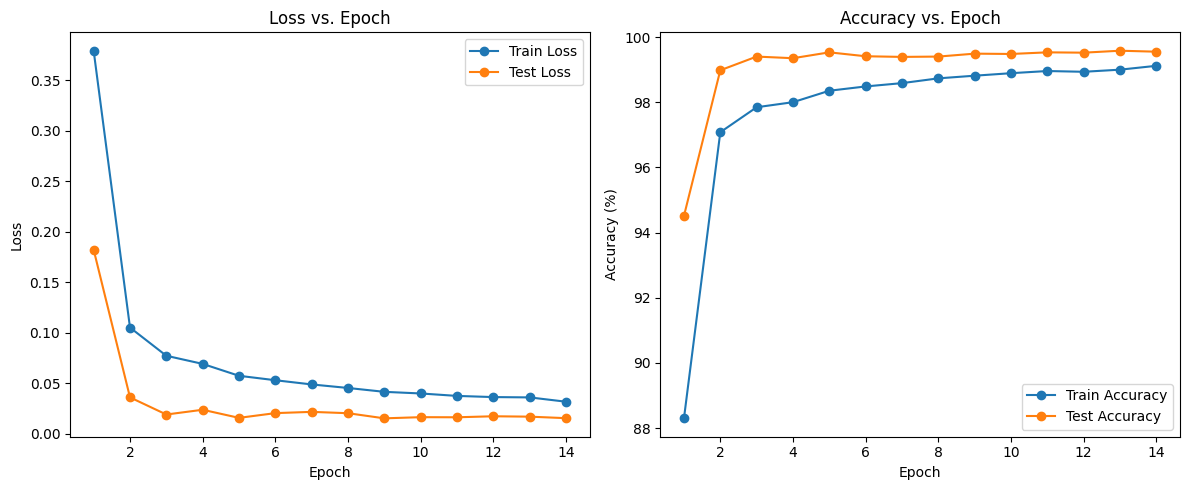

In [ ]:
import os
import cv2
import sys
import time
import random
import argparse
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.optim.lr_scheduler import StepLR
from PIL import Image
import matplotlib.pyplot as plt
import shutil
from google.colab import files

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # Increased number of filters in convolutional layers
        self.conv1 = nn.Conv2d(1, 64, 3, 1)  # Input channels: 1, Output channels: 64
        self.conv2 = nn.Conv2d(64, 128, 3, 1)  # Output channels: 128
        self.conv3 = nn.Conv2d(128, 256, 3, 1)  # Added a third convolutional layer
        self.dropout1 = nn.Dropout(0.25)
        self.dropout2 = nn.Dropout(0.4)
        self.fc1 = nn.Linear(256 * 5 * 5, 512)  # Adjusted input size for the new conv layer
        self.fc2 = nn.Linear(512, 256)  # Added an additional fully connected layer
        self.fc3 = nn.Linear(256, 10)  # Output layer

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = F.max_pool2d(x, 2)
        x = self.conv3(x)
        x = F.relu(x)
        x = F.max_pool2d(x, 2)
        x = self.dropout1(x)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.dropout2(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        return x # Output raw logits

# Custom transformation to add Salt-and-Pepper noise
class AddSaltPepperNoise:
    def __init__(self, salt_prob=0.01, pepper_prob=0.01):
        self.salt_prob = salt_prob
        self.pepper_prob = pepper_prob

    def __call__(self, tensor):
        img = tensor.numpy()
        noise = np.random.random(img.shape)
        img[noise < self.salt_prob] = 1.0
        img[noise > (1 - self.pepper_prob)] = 0.0
        return torch.from_numpy(img)

    def __repr__(self):
        return self.__class__.__name__ + '(salt_prob={0}, pepper_prob={1})'.format(self.salt_prob, self.pepper_prob)

# Training Function
def train(args, model, device, train_loader, optimizer, epoch):
    model.train()
    train_loss = 0
    correct = 0
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = F.cross_entropy(output, target)  # use cross_entropy
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        pred = output.argmax(dim=1, keepdim=True)
        correct += pred.eq(target.view_as(pred)).sum().item()

        if batch_idx % args.log_interval == 0:
            print(f'Train Epoch: {epoch} [{batch_idx * len(data)}/{len(train_loader.dataset)} ({100. * batch_idx / len(train_loader):.0f}%)]\tLoss: {loss.item():.6f}')

    train_loss /= len(train_loader)
    accuracy = 100. * correct / len(train_loader.dataset)
    return train_loss, accuracy

def test(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.cross_entropy(output, target, reduction='sum').item()  # use cross_entropy
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)
    accuracy = 100. * correct / len(test_loader.dataset)

    print(f'\nTest set: Average loss: {test_loss:.4f}, Accuracy: {correct}/{len(test_loader.dataset)} ({accuracy:.0f}%)\n')

    return test_loss, accuracy

# Train and Evaluate
def train_and_evaluate(args, model, device, train_loader, test_loader, optimizer, scheduler):
    test_losses = []
    test_accuracies = []
    train_losses = []
    train_accuracies = []

    best_test_loss = float('inf')  # Initialize with a very high value

    patience = 5  # Number of epochs to wait for improvement
    no_improvement_count = 0  # Counter for epochs without improvement

    # Create the "MNIST_Model" directory if it doesn't exist
    model_dir = f"MNIST_Model_seed_{args.seed}"
    if not os.path.exists(model_dir):
        os.makedirs(model_dir)

    for epoch in range(1, args.epochs + 1):
        train_loss, train_accuracy = train(args, model, device, train_loader, optimizer, epoch)
        test_loss, test_accuracy = test(model, device, test_loader)

        train_losses.append(train_loss)
        train_accuracies.append(train_accuracy)
        test_losses.append(test_loss)
        test_accuracies.append(test_accuracy)

        # Check if the current test loss is the best so far
        if test_loss < best_test_loss:
            best_test_loss = test_loss
            no_improvement_count = 0  # Reset the counter since we have improvement
            if args.save_model:
                model_filename = f"mnist_cnn_epoch:{epoch}_test-accuracy:{test_accuracy:.4f}_test-loss:{test_loss:.4f}.pt"
                model_path = os.path.join(model_dir, model_filename)  # Save model in the "MNIST_Model" directory
                try:
                    torch.save(model.state_dict(), model_path)
                    print(f"Model saved with new best test loss: {best_test_loss:.4f} \n")
                except Exception as e:
                    print(f"Error saving model: {e}")
        else:
            no_improvement_count += 1  # Increment the counter since there's no improvement

        # Early stopping check
        if no_improvement_count >= patience:
            print(f"\nEarly stopping triggered after {epoch} epochs. No improvement in test loss for {patience} consecutive epochs.")
            break

        scheduler.step()

    return train_losses, train_accuracies, test_losses, test_accuracies

# Plot graphs
def plot_results(train_losses, train_accuracies, test_losses, test_accuracies):
    epochs = range(1, len(train_losses) + 1)

    plt.figure(figsize=(12, 5))

    # Plot Train Loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_losses, 'o-', label='Train Loss')
    plt.plot(epochs, test_losses, 'o-', label='Test Loss')
    plt.title('Loss vs. Epoch')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    # Plot Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_accuracies, 'o-', label='Train Accuracy')
    plt.plot(epochs, test_accuracies, 'o-', label='Test Accuracy')
    plt.title('Accuracy vs. Epoch')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy (%)')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Main function
def main():
    # Generate a random seed
    random_seed = random.randint(0, 100000)
    print(f"Using random seed: {random_seed}")

    # Set the seed for reproducibility
    torch.manual_seed(random_seed)
    random.seed(random_seed)

    # Running in a Jupyter notebook
    args = argparse.Namespace(
        batch_size=64,
        test_batch_size=128,
        epochs=20,
        lr=1,
        gamma=0.9, # Factor for adjusting the learning rate in the scheduler, reducing it over time.
        no_cuda=False, # can use the GPU if available
        no_mps=False, #  can use the MPS if available
        dry_run=False, # If True, performs a quick single pass to test the setup.
        seed=random_seed,
        log_interval=10, # Determines how often to log training progress (e.g., every 10 batches).
        save_model=True
    )

    # Device Setup
    use_cuda = not args.no_cuda and torch.cuda.is_available()
    use_mps = not args.no_mps and torch.backends.mps.is_available()

    torch.manual_seed(args.seed)

    if use_cuda:
        device = torch.device("cuda")
    elif use_mps:
        device = torch.device("mps")
    else:
        device = torch.device("cpu")

    # Data Loading
    train_kwargs = {'batch_size': args.batch_size}
    test_kwargs = {'batch_size': args.test_batch_size}

    if use_cuda:
        cuda_kwargs = {'num_workers': 1,
                       'pin_memory': True,
                       'shuffle': True}
        train_kwargs.update(cuda_kwargs)
        test_kwargs.update(cuda_kwargs)

    # Data Loading with Augmentation for Training
    transform_train = transforms.Compose([
      transforms.ToTensor(),
      transforms.Normalize((0.1307,), (0.3081,)),
      transforms.RandomAffine(degrees=(-5,5), translate=(0.1, 0.1), scale=(0.9, 1.1), shear=5),
      transforms.RandomApply([transforms.ColorJitter(brightness=0.1, contrast=0.1)], p=0.3),
      transforms.RandomApply([AddSaltPepperNoise(salt_prob=0.01, pepper_prob=0.01)], p=0.2)
  ])

    # Transform for testing (no augmentation)
    transform_test = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))
    ])

    # Dataset and DataLoader
    dataset1 = datasets.MNIST('../data', train=True, download=True,
                       transform=transform_train)
    dataset2 = datasets.MNIST('../data', train=False,
                       transform=transform_test)

    train_loader = torch.utils.data.DataLoader(dataset1,**train_kwargs)
    test_loader = torch.utils.data.DataLoader(dataset2, **test_kwargs)

    # Model and Optimizer Initialization
    model = Net().to(device)
    optimizer = optim.Adadelta(model.parameters(), lr=args.lr) # optimizer: Adadelta / SGD / Adam
    scheduler = StepLR(optimizer, step_size=1, gamma=args.gamma)

    # Train and Evaluate
    train_losses, train_accuracies, test_losses, test_accuracies = train_and_evaluate(args, model, device, train_loader, test_loader, optimizer, scheduler)

    # Plot Results
    plot_results(train_losses, train_accuracies, test_losses, test_accuracies)

if __name__ == '__main__':
    main()

In [ ]:
import shutil
from google.colab import files

model_path = '/content/MNIST_Model_seed_56190'

# Compress the folder into a zip file
shutil.make_archive(model_path, 'zip', model_path)  # Use the same folder name

# Download the zip file in Google Colab
files.download('MNIST_Model_seed_56190.zip')  # Download the zip file with the correct name

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Add my own dataset

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
# Add this at the beginning of main()
import shutil

# Copy dataset from Google Drive to local storage
local_data_path = '/content/digits'
if not os.path.exists(local_data_path):
    shutil.copytree('/content/drive/MyDrive/Dataset/digits', local_data_path)

Using random seed: 53881
Train Epoch: 1 [0/61600 (0%)]	Loss: 2.305759
Train Epoch: 1 [640/61600 (1%)]	Loss: 2.172064
Train Epoch: 1 [1280/61600 (2%)]	Loss: 2.187256
Train Epoch: 1 [1920/61600 (3%)]	Loss: 2.233675
Train Epoch: 1 [2560/61600 (4%)]	Loss: 1.997879
Train Epoch: 1 [3200/61600 (5%)]	Loss: 1.203385
Train Epoch: 1 [3840/61600 (6%)]	Loss: 1.517178
Train Epoch: 1 [4480/61600 (7%)]	Loss: 0.778829
Train Epoch: 1 [5120/61600 (8%)]	Loss: 0.989521
Train Epoch: 1 [5760/61600 (9%)]	Loss: 0.963072
Train Epoch: 1 [6400/61600 (10%)]	Loss: 1.005636
Train Epoch: 1 [7040/61600 (11%)]	Loss: 0.440643
Train Epoch: 1 [7680/61600 (12%)]	Loss: 0.350894
Train Epoch: 1 [8320/61600 (13%)]	Loss: 0.375467
Train Epoch: 1 [8960/61600 (15%)]	Loss: 0.710815
Train Epoch: 1 [9600/61600 (16%)]	Loss: 0.300724
Train Epoch: 1 [10240/61600 (17%)]	Loss: 0.912520
Train Epoch: 1 [10880/61600 (18%)]	Loss: 0.260396
Train Epoch: 1 [11520/61600 (19%)]	Loss: 0.459545
Train Epoch: 1 [12160/61600 (20%)]	Loss: 0.276771
Train

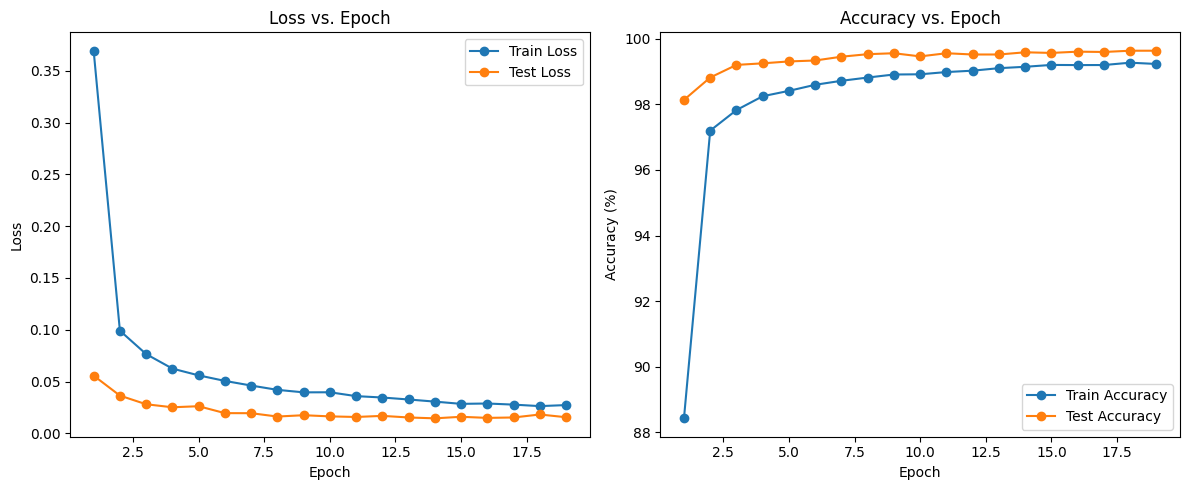

In [11]:
import os
import cv2
import sys
import time
import random
import argparse
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, ConcatDataset, random_split
from torch.optim.lr_scheduler import StepLR
from PIL import Image
import matplotlib.pyplot as plt
import shutil
from google.colab import files

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 64, 3, 1)  # Input channels: 1, Output channels: 64
        self.conv2 = nn.Conv2d(64, 128, 3, 1)  # Output channels: 128
        self.conv3 = nn.Conv2d(128, 256, 3, 1)  # Added a third convolutional layer
        self.dropout1 = nn.Dropout(0.25)
        self.dropout2 = nn.Dropout(0.4)
        self.fc1 = nn.Linear(256 * 5 * 5, 512)  # Adjusted input size for the new conv layer
        self.fc2 = nn.Linear(512, 256)  # Added an additional fully connected layer
        self.fc3 = nn.Linear(256, 10)  # Output layer

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = F.max_pool2d(x, 2)
        x = self.conv3(x)
        x = F.relu(x)
        x = F.max_pool2d(x, 2)
        x = self.dropout1(x)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.dropout2(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        return x

# Custom transformation to add Salt-and-Pepper noise
class AddSaltPepperNoise:
    def __init__(self, salt_prob=0.01, pepper_prob=0.01):
        self.salt_prob = salt_prob
        self.pepper_prob = pepper_prob

    def __call__(self, tensor):
        img = tensor.numpy()
        noise = np.random.random(img.shape)
        img[noise < self.salt_prob] = 1.0
        img[noise > (1 - self.pepper_prob)] = 0.0
        return torch.from_numpy(img)

    def __repr__(self):
        return self.__class__.__name__ + '(salt_prob={0}, pepper_prob={1})'.format(self.salt_prob, self.pepper_prob)

# Training Function
def train(args, model, device, train_loader, optimizer, epoch):
    model.train()
    train_loss = 0
    correct = 0
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = F.cross_entropy(output, target)  # use cross_entropy
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        pred = output.argmax(dim=1, keepdim=True)
        correct += pred.eq(target.view_as(pred)).sum().item()

        if batch_idx % args.log_interval == 0:
            print(f'Train Epoch: {epoch} [{batch_idx * len(data)}/{len(train_loader.dataset)} ({100. * batch_idx / len(train_loader):.0f}%)]\tLoss: {loss.item():.6f}')

    train_loss /= len(train_loader)
    accuracy = 100. * correct / len(train_loader.dataset)
    return train_loss, accuracy

# Testing Function
def test(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.cross_entropy(output, target, reduction='sum').item()  # use cross_entropy
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)
    accuracy = 100. * correct / len(test_loader.dataset)

    print(f'\nTest set: Average loss: {test_loss:.4f}, Accuracy: {correct}/{len(test_loader.dataset)} ({accuracy:.0f}%)\n')

    return test_loss, accuracy

# Train and Evaluate
def train_and_evaluate(args, model, device, train_loader, test_loader, optimizer, scheduler):
    test_losses = []
    test_accuracies = []
    train_losses = []
    train_accuracies = []

    best_test_loss = float('inf')
    patience = 5
    no_improvement_count = 0

    model_dir = f"Combined_Model_seed_{args.seed}"
    if not os.path.exists(model_dir):
        os.makedirs(model_dir)

    for epoch in range(1, args.epochs + 1):
        train_loss, train_accuracy = train(args, model, device, train_loader, optimizer, epoch)
        test_loss, test_accuracy = test(model, device, test_loader)

        train_losses.append(train_loss)
        train_accuracies.append(train_accuracy)
        test_losses.append(test_loss)
        test_accuracies.append(test_accuracy)

        if test_loss < best_test_loss:
            best_test_loss = test_loss
            no_improvement_count = 0
            if args.save_model and epoch > 2:
                model_filename = f"combined_cnn_epoch:{epoch}_test-accuracy:{test_accuracy:.4f}_test-loss:{test_loss:.4f}.pt"
                model_path = os.path.join(model_dir, model_filename)
                try:
                    torch.save(model.state_dict(), model_path)
                    print(f"Model saved with new best test loss: {best_test_loss:.4f} \n")
                except Exception as e:
                    print(f"Error saving model: {e}")
        else:
            no_improvement_count += 1

        if no_improvement_count >= patience:
            print(f"\nEarly stopping triggered after {epoch} epochs. No improvement in test loss for {patience} consecutive epochs.")
            break

        scheduler.step()

    return train_losses, train_accuracies, test_losses, test_accuracies

# Plot graphs
def plot_results(train_losses, train_accuracies, test_losses, test_accuracies):
    epochs = range(1, len(train_losses) + 1)
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_losses, 'o-', label='Train Loss')
    plt.plot(epochs, test_losses, 'o-', label='Test Loss')
    plt.title('Loss vs. Epoch')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_accuracies, 'o-', label='Train Accuracy')
    plt.plot(epochs, test_accuracies, 'o-', label='Test Accuracy')
    plt.title('Accuracy vs. Epoch')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy (%)')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Main function
def main():
    random_seed = random.randint(0, 100000)
    print(f"Using random seed: {random_seed}")

    torch.manual_seed(random_seed)
    random.seed(random_seed)

    args = argparse.Namespace(
        batch_size=64,
        test_batch_size=128,
        epochs=20,
        lr=1,
        gamma=0.9,
        no_cuda=False,
        no_mps=False,
        dry_run=False,
        seed=random_seed,
        log_interval=10,
        save_model=True
    )

    use_cuda = not args.no_cuda and torch.cuda.is_available()
    use_mps = not args.no_mps and torch.backends.mps.is_available()

    torch.manual_seed(args.seed)

    if use_cuda:
        device = torch.device("cuda")
    elif use_mps:
        device = torch.device("mps")
    else:
        device = torch.device("cpu")

    train_kwargs = {'batch_size': args.batch_size}
    test_kwargs = {'batch_size': args.test_batch_size}

    if use_cuda:
        cuda_kwargs = {'num_workers': 1, 'pin_memory': True, 'shuffle': True}
        train_kwargs.update(cuda_kwargs)
        test_kwargs.update(cuda_kwargs)

    # Data Loading with Augmentation for Training
    transform_train = transforms.Compose([
        transforms.Grayscale(),  # Ensure custom dataset images are grayscale
        transforms.Resize((28, 28)),  # Resize to match MNIST dimensions
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,)),
        transforms.RandomAffine(degrees=(-5,5), translate=(0.1, 0.1), scale=(0.9, 1.1), shear=5),
        transforms.RandomApply([transforms.ColorJitter(brightness=0.1, contrast=0.1)], p=0.3),
        transforms.RandomApply([AddSaltPepperNoise(salt_prob=0.01, pepper_prob=0.01)], p=0.2)
    ])

    # Transform for testing (no augmentation)
    transform_test = transforms.Compose([
        transforms.Grayscale(),
        transforms.Resize((28, 28)),
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))
    ])

    # Load MNIST dataset
    mnist_train = datasets.MNIST('../data', train=True, download=True, transform=transform_train)
    mnist_test = datasets.MNIST('../data', train=False, transform=transform_test)

    # Load custom dataset
    data_path = '/content/digits'  # Use local path instead of Google Drive
    custom_dataset = datasets.ImageFolder(root=data_path, transform=transform_train)

    # Split custom dataset into 80% train and 20% test
    train_size = int(0.8 * len(custom_dataset))
    test_size = len(custom_dataset) - train_size
    custom_train, custom_test = random_split(custom_dataset, [train_size, test_size])

    # Apply test transform to the custom test dataset
    custom_test.dataset.transform = transform_test

    # Combine MNIST and custom training datasets
    combined_train = ConcatDataset([mnist_train, custom_train])
    combined_test = ConcatDataset([mnist_test, custom_test])

    # Create DataLoaders
    train_loader = DataLoader(combined_train, **train_kwargs)
    test_loader = DataLoader(combined_test, **test_kwargs)

    # Model and Optimizer Initialization
    model = Net().to(device)
    optimizer = optim.Adadelta(model.parameters(), lr=args.lr)
    scheduler = StepLR(optimizer, step_size=1, gamma=args.gamma)

    # Train and Evaluate
    train_losses, train_accuracies, test_losses, test_accuracies = train_and_evaluate(args, model, device, train_loader, test_loader, optimizer, scheduler)

    # Plot Results
    plot_results(train_losses, train_accuracies, test_losses, test_accuracies)

if __name__ == '__main__':
    main()

In [12]:
import shutil
from google.colab import files

model_path = '/content/Combined_Model_seed_53881'

# Compress the folder into a zip file
shutil.make_archive(model_path, 'zip', model_path)  # Use the same folder name

# Download the zip file in Google Colab
files.download('Combined_Model_seed_53881.zip')  # Download the zip file with the correct name

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Visualize the architecture

In [18]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchsummary import summary

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 64, 3, 1)
        self.conv2 = nn.Conv2d(64, 128, 3, 1)
        self.conv3 = nn.Conv2d(128, 256, 3, 1)
        self.dropout1 = nn.Dropout(0.25)
        self.dropout2 = nn.Dropout(0.4)
        self.fc1 = nn.Linear(256 * 5 * 5, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = F.max_pool2d(x, 2)
        x = self.conv3(x)
        x = F.relu(x)
        x = F.max_pool2d(x, 2)
        x = self.dropout1(x)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.dropout2(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        return x

# Check if GPU is available and set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# Initialize model and move to device
model = Net().to(device)
# Print model summary (input_size=(1, 28, 28) for MNIST-like input)
summary(model, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 26, 26]             640
            Conv2d-2          [-1, 128, 24, 24]          73,856
            Conv2d-3          [-1, 256, 10, 10]         295,168
           Dropout-4            [-1, 256, 5, 5]               0
            Linear-5                  [-1, 512]       3,277,312
           Dropout-6                  [-1, 512]               0
            Linear-7                  [-1, 256]         131,328
            Linear-8                   [-1, 10]           2,570
Total params: 3,780,874
Trainable params: 3,780,874
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 1.15
Params size (MB): 14.42
Estimated Total Size (MB): 15.57
----------------------------------------------------------------
